# Calm Code

https://calmcode.io

## args kwargs

In [ ]:
def multiply(a, b):
    return a*b

print(multiply(2,3))

In [ ]:
def multiply(*args):
    print(args)
    result = 1
    for n in args:
        result = result*n
    return result

print(multiply(2,3,4,5))

In [ ]:
def func(a, b, *args, keyword=True, **kwargs):
    print(a, b)
    print(args)
    print(keyword)
    print(kwargs)

In [ ]:
func(2,3,4,3,5, param=21)

In [ ]:
arr = [4,3,5]
pars = {'p1': 2, 'p2': 'hi'}
func(2,3,*arr, param=21, **pars)

## Comprehensions

In [ ]:
old_list = [1,2,3,4,5]
new_list = []
for i in old_list:
    new_list.append(i*2)
new_list

In [ ]:
[i*2 for i in old_list]

In [ ]:
[i*2 for i in old_list if i%2==0]

In [ ]:
[i*2 if i>3 else i*3 for i in old_list if i%2==0]

In [ ]:
[char for idx, char in enumerate('abcde') if idx%2==0]

In [ ]:
[char.upper() if char in 'aeiou' else char 
 for idx, char in enumerate('abcde') 
 if idx%2==0]

In [ ]:
[(i,j) for i in range(5) if i>2 for j in range(i) if j<2]

set comprehension

In [ ]:
{c for c in 'abceabf'}

In [ ]:
tuple(c for c in 'abceabf')

In [ ]:
{i:c for i,c in enumerate('abceabf')}

In [ ]:
{c:i for i,c in enumerate('abcdefa')}

In [ ]:
arr = [('a',1), ('b', 2), ('c', 3)]

In [ ]:
[{key:val} for idx, (key,val) in enumerate(arr)]

In [ ]:
d = {'a': 1, 'b': 2, 'c': 3}
[(k,v) for k,v in d.items()]

In [ ]:
[(a,b) for a,b in zip([1,2,3], [4,5,6])]

In [ ]:
[(a,b,c) for a,b,c in zip([1,2,3], [4,5,6], [7,8,9])]

## Method Chains

In [ ]:
# !curl https://calmcode.io/datasets/pokemon.json --output pokemon.json

In [ ]:
import json
import pathlib

In [ ]:
poke_dict = json.loads(pathlib.Path("../data/raw/pokemon.json").read_text())

In [ ]:
poke_dict[:3]

In [ ]:
class Clumper:
    def __init__(self, blob):
        self.blob = blob
        
    def keep(self, func):
        return [d for d in self.blob if func(d)]

In [ ]:
Clumper(poke_dict).keep(lambda d: 'Grass' in d['type'])

In [ ]:
class Clumper:
    def __init__(self, blob):
        self.blob = blob
        
    def keep(self, func):
        return Clumper([d for d in self.blob if func(d)])

In [ ]:
(Clumper(poke_dict)
 .keep(lambda d: 'Grass' in d['type'])
 .keep(lambda d: d['hp'] < 60)
 .blob
)

In [ ]:
class Clumper:
    def __init__(self, blob):
        self.blob = blob
        
    def keep(self, *funcs):
        data = self.blob
        for func in funcs:
            data = [d for d in data if func(d)]
        return Clumper(data)

In [ ]:
(Clumper(poke_dict)
 .keep(lambda d: 'Grass' in d['type'],
       lambda d: d['hp'] < 60)
 .blob
)

In [ ]:
class Clumper:
    def __init__(self, blob):
        self.blob = blob
        
    def keep(self, *funcs):
        data = self.blob
        for func in funcs:
            data = [d for d in data if func(d)]
        return Clumper(data)
    
    def head(self, n):
        return Clumper([self.blob[i] for i in range(n)])
    
    def tail(self, n):
        return Clumper([self.blob[-i] for i in range(1,n+1)])

In [ ]:
(Clumper(poke_dict)
 .keep(lambda d: 'Grass' in d['type'],
       lambda d: d['hp'] < 60)
 .head(2)
 .blob
)

In [ ]:
(Clumper(poke_dict)
 .keep(lambda d: 'Grass' in d['type'],
       lambda d: d['hp'] < 60)
 .tail(2)
 .blob
)

In [ ]:
class Clumper:
    def __init__(self, blob):
        self.blob = blob
        
    def keep(self, *funcs):
        data = self.blob
        for func in funcs:
            data = [d for d in data if func(d)]
        return Clumper(data)
    
    def head(self, n):
        return Clumper([self.blob[i] for i in range(n)])
    
    def tail(self, n):
        return Clumper([self.blob[-i] for i in range(1,n+1)])
    
    def select(self, *keys):
        return Clumper([{k:d[k] for k in keys} for d in self.blob])
    
    def mutate(self, **kwargs):
        data = self.blob
        for key, func in kwargs.items():
            for i in range(len(data)):            
                data[i][key] = func(data[i])
        return Clumper(data)

In [ ]:
(Clumper(poke_dict)
 .keep(lambda d: 'Grass' in d['type'],
       lambda d: d['hp'] < 60)
 .tail(2)
 .select('name', 'hp')
 .mutate(hp = lambda d: d['hp']*2,
         hp4 = lambda d: d['hp']*4)
 .blob
)

In [ ]:
class Clumper:
    def __init__(self, blob):
        self.blob = blob
        
    def keep(self, *funcs):
        data = self.blob
        for func in funcs:
            data = [d for d in data if func(d)]
        return Clumper(data)
    
    def head(self, n):
        return Clumper([self.blob[i] for i in range(n)])
    
    def tail(self, n):
        return Clumper([self.blob[-i] for i in range(1,n+1)])
    
    def select(self, *keys):
        return Clumper([{k:d[k] for k in keys} for d in self.blob])
    
    def mutate(self, **kwargs):
        data = self.blob
        for key, func in kwargs.items():
            for i in range(len(data)):            
                data[i][key] = func(data[i])
        return Clumper(data)
    
    def sort(self, key, reverse=False):
        return Clumper(sorted(self.blob, key=key, reverse=reverse))

In [ ]:
(Clumper(poke_dict)
 .keep(lambda d: 'Grass' in d['type'],
       lambda d: d['hp'] < 60)
 .select('name', 'hp')
 .sort(lambda d: d['hp'], reverse=True)
 .blob
)

## Pandas Pipe

In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('https://calmcode.io/datasets/bigmac.csv')

In [83]:
df.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1.00,2.500000
1,2000-04-01,AUD,Australia,2.59,1.68,1.541667
2,2000-04-01,BRL,Brazil,2.95,1.79,1.648045
3,2000-04-01,CAD,Canada,2.85,1.47,1.938776
4,2000-04-01,CHF,Switzerland,5.90,1.70,3.470588


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1330 non-null   object 
 1   currency_code  1330 non-null   object 
 2   name           1330 non-null   object 
 3   local_price    1330 non-null   float64
 4   dollar_ex      1330 non-null   float64
 5   dollar_price   1330 non-null   float64
dtypes: float64(3), object(3)
memory usage: 62.5+ KB


In [75]:
def set_dtypes(dataf):
    return (dataf
            .assign(date = lambda d: pd.to_datetime(d['date']))
            .sort_values(['currency_code', 'date'])
           )

def remove_outliers(dataf, min_row_country=32):
    countries = (dataf
                 .groupby('currency_code')
                 .agg(n=('name', 'count'))
                 .loc[lambda d: d['n']>=min_row_country]
                 .index
                )
    
    return (dataf
            .loc[lambda d: d['currency_code'].isin(countries)]
           )

In [77]:
df.pipe(set_dtypes).pipe(remove_outliers, min_row_country=20).shape

(1248, 6)

In [88]:
df = pd.read_csv('https://calmcode.io/datasets/bigmac.csv')

def start_pipeline(dataf):
    return dataf.copy()

def set_types(dataf):
    dataf['date'] = pd.to_datetime(dataf['date'])
    return dataf

df.pipe(start_pipeline).pipe(set_types).dtypes

date             datetime64[ns]
currency_code            object
name                     object
local_price             float64
dollar_ex               float64
dollar_price            float64
dtype: object

In [89]:
from functools import wraps
import datetime as dt

def log_step(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        tic = dt.datetime.now()
        result = func(*args, **kwargs)
        time_taken = str(dt.datetime.now()-tic)
        print(f"just ran step {func.__name__} shape={result.shape} took {time_taken}s")
        return result
    return wrapper

In [90]:
df = pd.read_csv('https://calmcode.io/datasets/bigmac.csv')

@log_step
def start_pipeline(dataf):
    return dataf.copy()

@log_step
def set_dtypes(dataf):
    return (dataf
            .assign(date = lambda d: pd.to_datetime(d['date']))
            .sort_values(['currency_code', 'date'])
           )

@log_step
def remove_outliers(dataf, min_row_country=32):
    countries = (dataf
                 .groupby('currency_code')
                 .agg(n=('name', 'count'))
                 .loc[lambda d: d['n']>=min_row_country]
                 .index
                )
    
    return (dataf
            .loc[lambda d: d['currency_code'].isin(countries)]
           )

In [91]:
(df
 .pipe(start_pipeline)
 .pipe(set_dtypes)
 .pipe(remove_outliers)
)

just ran step start_pipeline shape=(1330, 6) took 0:00:00.000436s
just ran step set_dtypes shape=(1330, 6) took 0:00:00.006420s
just ran step remove_outliers shape=(864, 6) took 0:00:00.009544s


,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1.00000,2.500000
28,2001-04-01,ARS,Argentina,2.50,1.00000,2.500000
56,2002-04-01,ARS,Argentina,2.50,3.13000,0.798722
88,2003-04-01,ARS,Argentina,4.10,2.88000,1.423611
119,2004-05-01,ARS,Argentina,4.36,2.95000,1.477966
...,...,...,...,...,...,...
1105,2018-01-01,ZAR,South Africa,30.00,12.25815,2.447351
1161,2018-07-01,ZAR,South Africa,31.00,13.36190,2.320029
1217,2019-01-01,ZAR,South Africa,31.00,13.86750,2.235443
1273,2019-07-09,ZAR,South Africa,31.00,14.17500,2.186949


## Patsy

In [93]:
# !curl https://calmcode.io/datasets/birthdays.csv --output ../data/raw/birthdays.csv

In [94]:
import patsy as ps
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.linear_model import LinearRegression

df = pd.read_csv("../data/raw/birthdays.csv")

def clean_data(dataf):
    return (dataf
            .drop(columns=['Unnamed: 0'])
            .assign(date = lambda d: pd.to_datetime(d['date']))
            .groupby(['date', 'wday', 'month'])
            .agg(n_born=('births', 'sum'))
            .reset_index()
            .assign(yday = lambda d: d['date'].dt.dayofyear))

df_clean = df.pipe(clean_data)

In [95]:
df_clean.head()

,date,wday,month,n_born,yday
0,1969-01-01,Wed,1,8486,1
1,1969-01-02,Thurs,1,9002,2
2,1969-01-03,Fri,1,9542,3
3,1969-01-04,Sat,1,8960,4
4,1969-01-05,Sun,1,8390,5


In [96]:
y, X = ps.dmatrices("n_born ~ wday + yday", df_clean)

In [97]:
X

DesignMatrix with shape (7368, 8)
  Columns:
    ['Intercept',
     'wday[T.Mon]',
     'wday[T.Sat]',
     'wday[T.Sun]',
     'wday[T.Thurs]',
     'wday[T.Tues]',
     'wday[T.Wed]',
     'yday']
  Terms:
    'Intercept' (column 0), 'wday' (columns 1:7), 'yday' (column 7)
  (to view full data, use np.asarray(this_obj))

In [98]:
X[:5]

array([[1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0., 0., 2.],
       [1., 0., 0., 0., 0., 0., 0., 3.],
       [1., 0., 1., 0., 0., 0., 0., 4.],
       [1., 0., 0., 1., 0., 0., 0., 5.]])

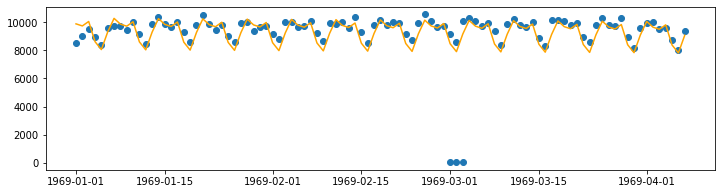

In [103]:
df_ml = df_clean.head(100)

y,X = ps.dmatrices("n_born ~ wday+yday", df_ml)
mod = LinearRegression().fit(X,y)

plt.figure(figsize=(12,3))
plt.scatter(df_ml['date'], y)
plt.plot(df_ml['date'], mod.predict(X), color='orange')

In [106]:
y, X = ps.dmatrices("n_born ~ wday + yday - 1 + C(month)", df_clean)
X

DesignMatrix with shape (7368, 19)
  Columns:
    ['wday[Fri]',
     'wday[Mon]',
     'wday[Sat]',
     'wday[Sun]',
     'wday[Thurs]',
     'wday[Tues]',
     'wday[Wed]',
     'C(month)[T.2]',
     'C(month)[T.3]',
     'C(month)[T.4]',
     'C(month)[T.5]',
     'C(month)[T.6]',
     'C(month)[T.7]',
     'C(month)[T.8]',
     'C(month)[T.9]',
     'C(month)[T.10]',
     'C(month)[T.11]',
     'C(month)[T.12]',
     'yday']
  Terms:
    'wday' (columns 0:7)
    'C(month)' (columns 7:18)
    'yday' (column 18)
  (to view full data, use np.asarray(this_obj))

In [107]:
import numpy as np

def date_to_num(date_col):
    return (date_col - date_col.min()).dt.days

y, X = ps.dmatrices("n_born ~ np.log(yday) + date_to_num(date)", df_clean)
X

DesignMatrix with shape (7368, 3)
  Intercept  np.log(yday)  date_to_num(date)
          1       0.00000                  0
          1       0.69315                  1
          1       1.09861                  2
          1       1.38629                  3
          1       1.60944                  4
          1       1.79176                  5
          1       1.94591                  6
          1       2.07944                  7
          1       2.19722                  8
          1       2.30259                  9
          1       2.39790                 10
          1       2.48491                 11
          1       2.56495                 12
          1       2.63906                 13
          1       2.70805                 14
          1       2.77259                 15
          1       2.83321                 16
          1       2.89037                 17
          1       2.94444                 18
          1       2.99573                 19
          1       3.0

In [108]:
y, X = ps.dmatrices("n_born ~ np.log(yday) * date_to_num(date)", df_clean)
X

DesignMatrix with shape (7368, 4)
  Intercept  np.log(yday)  date_to_num(date)  np.log(yday):date_to_num(date)
          1       0.00000                  0                         0.00000
          1       0.69315                  1                         0.69315
          1       1.09861                  2                         2.19722
          1       1.38629                  3                         4.15888
          1       1.60944                  4                         6.43775
          1       1.79176                  5                         8.95880
          1       1.94591                  6                        11.67546
          1       2.07944                  7                        14.55609
          1       2.19722                  8                        17.57780
          1       2.30259                  9                        20.72327
          1       2.39790                 10                        23.97895
          1       2.48491                 

In [109]:
y, X = ps.dmatrices("n_born ~ np.log(yday) : date_to_num(date)", df_clean)
X

DesignMatrix with shape (7368, 2)
  Intercept  np.log(yday):date_to_num(date)
          1                         0.00000
          1                         0.69315
          1                         2.19722
          1                         4.15888
          1                         6.43775
          1                         8.95880
          1                        11.67546
          1                        14.55609
          1                        17.57780
          1                        20.72327
          1                        23.97895
          1                        27.33397
          1                        30.77939
          1                        34.30775
          1                        37.91270
          1                        41.58883
          1                        45.33141
          1                        49.13632
          1                        52.99990
          1                        56.91891
          1                        60.8904

In [111]:
y, X = ps.dmatrices("n_born ~ (np.log(yday) + date_to_num(date) + wday)**3", df_clean)

X

DesignMatrix with shape (7368, 28)
  Columns:
    ['Intercept',
     'wday[T.Mon]',
     'wday[T.Sat]',
     'wday[T.Sun]',
     'wday[T.Thurs]',
     'wday[T.Tues]',
     'wday[T.Wed]',
     'np.log(yday)',
     'np.log(yday):wday[T.Mon]',
     'np.log(yday):wday[T.Sat]',
     'np.log(yday):wday[T.Sun]',
     'np.log(yday):wday[T.Thurs]',
     'np.log(yday):wday[T.Tues]',
     'np.log(yday):wday[T.Wed]',
     'date_to_num(date)',
     'date_to_num(date):wday[T.Mon]',
     'date_to_num(date):wday[T.Sat]',
     'date_to_num(date):wday[T.Sun]',
     'date_to_num(date):wday[T.Thurs]',
     'date_to_num(date):wday[T.Tues]',
     'date_to_num(date):wday[T.Wed]',
     'np.log(yday):date_to_num(date)',
     'np.log(yday):date_to_num(date):wday[T.Mon]',
     'np.log(yday):date_to_num(date):wday[T.Sat]',
     'np.log(yday):date_to_num(date):wday[T.Sun]',
     'np.log(yday):date_to_num(date):wday[T.Thurs]',
     'np.log(yday):date_to_num(date):wday[T.Tues]',
     'np.log(yday):date_to_num(date):

# Annoy

In [1]:
import numpy as np
import matplotlib.pylab as plt
from annoy import AnnoyIndex

In [2]:
columns = 2

vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)),
    np.random.normal(0, 0.5, (5000, columns)),
])

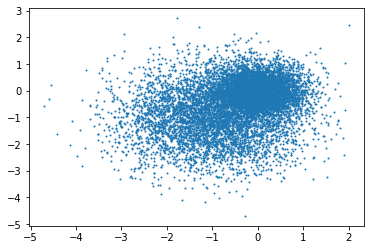

In [3]:
plt.scatter(vecs[:, 0], vecs[:, 1], s=1)

In [10]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=10)

True

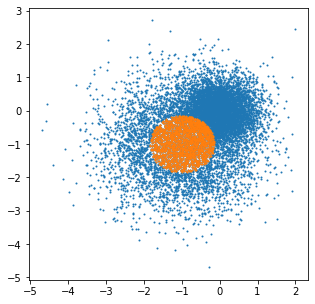

In [11]:
plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1)

indices = annoy.get_nns_by_vector(np.array([-1., -1.]), 2000)

subset = vecs[indices, :]
plt.scatter(subset[:, 0], subset[:, 1], s=1);

# Human Learn

In [12]:
import numpy as np
import pandas as pd

from hulearn.datasets import load_titanic
from sklearn.model_selection import GridSearchCV

/Users/amangal/anaconda3/envs/stanford-nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/amangal/anaconda3/envs/stanford-nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/amangal/anaconda3/envs/stanford-nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/amangal/anaconda3/envs/stanford-nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/amangal/anaconda3/envs/stanfo

In [13]:
df = load_titanic(as_frame=True)

In [14]:
X,y = df.drop(columns=['survived']), df['survived']

In [15]:
df.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


In [16]:
def fare_based(dataf, threshold=10):
    return np.array(dataf['fare'] > threshold).astype(int)

In [17]:
fare_based(X)

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [18]:
from hulearn.classification import FunctionClassifier
# This next line of code changes the function into a proper scikit-learn compatible model.
mod = FunctionClassifier(fare_based, threshold=10)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

grid = GridSearchCV(mod, 
                    cv=2, 
                    param_grid={'threshold': np.linspace(0, 100, 30)},
                    scoring={'accuracy': make_scorer(accuracy_score), 
                            'precision': make_scorer(precision_score),
                            'recall': make_scorer(recall_score)},
                    refit='accuracy'
                )
grid.fit(X, y)

GridSearchCV(cv=2,
             estimator=FunctionClassifier(func=<function fare_based at 0x7fc8d0ec6e18>,
                                          threshold=10),
             param_grid={'threshold': array([  0.        ,   3.44827586,   6.89655172,  10.34482759,
        13.79310345,  17.24137931,  20.68965517,  24.13793103,
        27.5862069 ,  31.03448276,  34.48275862,  37.93103448,
        41.37931034,  44.82758621,  48.27586207,  51.72413793,
        55.17241379,  58.62068966,  62.06896552,  65.51724138,
        68.96551724,  72.4137931 ,  75.86206897,  79.31034483,
        82.75862069,  86.20689655,  89.65517241,  93.10344828,
        96.55172414, 100.        ])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

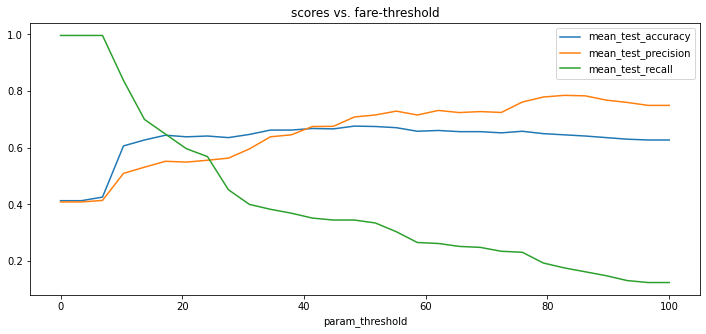

In [20]:
score_df = (pd.DataFrame(grid.cv_results_)
  .set_index('param_threshold')
  [['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']])

score_df.plot(figsize=(12, 5), title="scores vs. fare-threshold");